### Data Splitting

In [29]:
#importing
import pandas as pd
import scipy
import joblib
from sklearn.model_selection import train_test_split
from scipy.sparse import load_npz

In [30]:
# load the data
# x= features, y= labels(target)
x= load_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/tfidf_features.npz')
y=pd.read_csv(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/labeled_data.csv')

# splitting the data into training and testing sets
# test_size=0.2 , 20% of data for testing, 80% for training
# random_state=42, ensures reproducibility
# stratify=Y['label'], ensures that the proportion of 'genuine' and 'not_genuine' complaints is roughly the same in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42, stratify=y
)

# data split information
print(f"Total number of samples: {x.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

print("Class distribution in original dataset:")
print(y.value_counts(normalize=True))
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in testing set:")
print(y_test.value_counts(normalize=True))

Total number of samples: 9874
Training set size: 7899
Testing set size: 1975
Number of features: 10000
Class distribution in original dataset:
labeled
1          0.503848
0          0.496152
Name: proportion, dtype: float64
Class distribution in training set:
labeled
1          0.503861
0          0.496139
Name: proportion, dtype: float64
Class distribution in testing set:
labeled
1          0.503797
0          0.496203
Name: proportion, dtype: float64


In [31]:
# saving the split data
scipy.sparse.save_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/X_train.npz', X_train)
scipy.sparse.save_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/X_test.npz', X_test)

joblib.dump(y_train, r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/y_train.pkl')
joblib.dump(y_test, r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/y_test.pkl')

print("Split sets saved successfully!")

Split sets saved successfully!


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

### Training the model using Multinomial Naive Bayes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# instantiating Multinomial Naive Bayes
mult_NB = MultinomialNB()
print(mult_NB.get_params())

mult_NB.fit(X_train, y_train)

print("Model trained successfully.")

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Model trained successfully.


d:\jka-ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#predicting the model
y_pred_mnb = mult_NB.predict(X_test)

Accuracy: 0.9843037974683544
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98       995

    accuracy                           0.98      1975
   macro avg       0.98      0.98      0.98      1975
weighted avg       0.98      0.98      0.98      1975



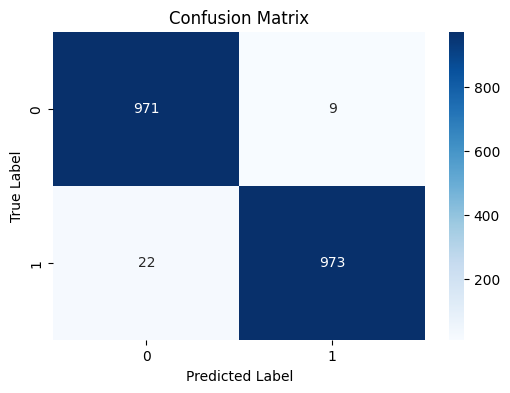

In [ ]:
# Evaluating the model
# accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy:", accuracy_mnb)

classificationReport = classification_report(y_test, y_pred_mnb)
print(f"Classification Report: ", classificationReport)

confusionMatrix = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(6,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# print(confusionMatrix)

### Checking the model accuracy by tuning hyperparameter using GridSearch

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found: {'alpha': 0.01}
Best cross validation: 0.9944295780857937
Accuracy: 0.9959493670886076
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       995

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975



d:\jka-ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


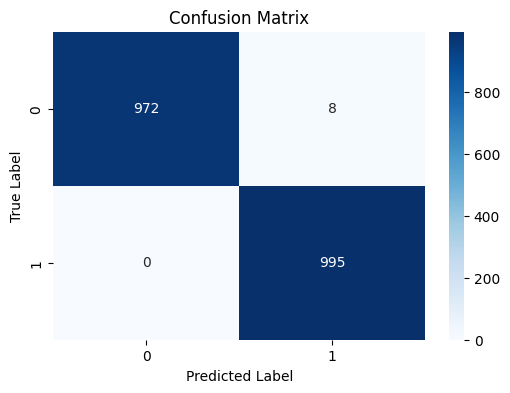

[[972   8]
 [  0 995]]


In [36]:
parameters = {
    'alpha':[
        0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0
    ]
}


# performing 5-Fold (K-Fold) cross validation (here the data is divided into 5 parts and in each part, eg: fold 1 is used for testing and remaining folds are used for training and so one. At last it average the results for final score)
classifier = GridSearchCV(mult_NB, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1 ) #verbose = showing progess, n_jobs= using all gpu capacity for faster tuning
classifier.fit(X_train, y_train)

print(f"Best parameters found: {classifier.best_params_}")
print(f"Best cross validation: {classifier.best_score_}")

best_mnb_model = classifier.best_estimator_

y_pred_tuned_mnb = best_mnb_model.predict(X_test)

# Evaluation
accuracy_mnb = accuracy_score(y_test, y_pred_tuned_mnb)
print(f"Accuracy:", accuracy_mnb)

classificationReport = classification_report(y_test, y_pred_tuned_mnb)
print(f"Classification Report: ", classificationReport)

confusionMatrix = confusion_matrix(y_test, y_pred_tuned_mnb)
plt.figure(figsize=(6,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(confusionMatrix)



In [37]:
#saving the model
joblib.dump(mult_NB, r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/mult_NB_model_tuned.pkl')

print("Model saved successfully.")

Model saved successfully.


In [ ]:
# The model has significantly improved its accuracy from 92% to 97% after tuning hyperparameter.

### Training model using SVM (Support Vector Machine)

In [44]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x= load_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/tfidf_features.npz')
y=pd.read_csv(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/labeled_data.csv')

# splitting the data into training and testing sets
# test_size=0.2 , 20% of data for testing, 80% for training
# random_state=42, ensures reproducibility
# stratify=Y['label'], ensures that the proportion of 'genuine' and 'not_genuine' complaints is roughly the same in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42, stratify=y
)

# data split information
print(f"Total number of samples: {x.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Total number of samples: 9874
Training set size: 7899
Testing set size: 1975
Number of features: 10000


In [ ]:
from sklearn.svm import LinearSVC
linear_svm_model = LinearSVC(class_weight='balanced', max_iter=20000)
linear_svm_model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


d:\jka-ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
y_pred_linSVC = linear_svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_linSVC))
print("Classification Report:\n", classification_report(y_test, y_pred_linSVC))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linSVC))


Accuracy: 0.9964556962025316
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       995

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975

Confusion Matrix:
 [[973   7]
 [  0 995]]


In [47]:

joblib.dump(linear_svm_model, r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/svm_model.pkl')
print("Model saved successfully.")

Model saved successfully.


### SVM model trained by tuning hyperparameter


--- Hyperparameter Tuning for LinearSVC ---
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best parameters found for LinearSVC: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 10000}
Best cross-validation score (accuracy) for LinearSVC: 0.9970

--- Tuned LinearSVC Model Evaluation on Test Set ---
Accuracy: 0.9965

Classification Report (Tuned LinearSVC):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       995

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975


Confusion Matrix (Tuned LinearSVC):
[[973   7]
 [  0 995]]


d:\jka-ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


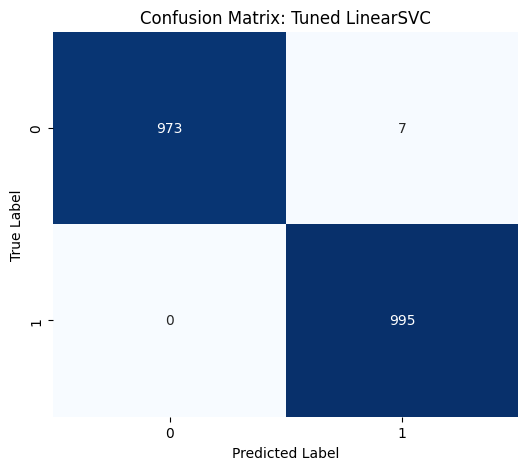

In [38]:
from sklearn.svm import LinearSVC # Import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x, y, X_train, X_test, y_train, y_test are loaded/defined from your previous steps
x= load_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/tfidf_features.npz')
y=pd.read_csv(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/labeled_data.csv')

# splitting the data into training and testing sets
# test_size=0.2 , 20% of data for testing, 80% for training
# random_state=42, ensures reproducibility
# stratify=Y['label'], ensures that the proportion of 'genuine' and 'not_genuine' complaints is roughly the same in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42, stratify=y
)

print("\n--- Hyperparameter Tuning for LinearSVC ---")

# Define the parameter grid for LinearSVC
param_grid_linear_svc = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0], # Explore a wider range of C
    'class_weight': ['balanced', None], # Keep class_weight as an option to tune
    'max_iter': [10000, 20000] # Ensure sufficient iterations
}

# Create a LinearSVC model instance
linear_svc = LinearSVC(random_state=42) # Set random_state for reproducibility

# Initialize GridSearchCV
grid_search_linear_svc = GridSearchCV(
    estimator=linear_svc,
    param_grid=param_grid_linear_svc,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Can try 'f1_weighted' if you want a balance of both classes F1
    verbose=1,            # Show progress
    n_jobs=-1             # Use all available CPU cores
)

# Fit GridSearchCV on the training data
# Ensure y_train is 1D if you were getting warnings earlier
# y_train_linSVC_tuned = y_train.values.ravel() if hasattr(y_train, 'values') else y_train
grid_search_linear_svc.fit(X_train, y_train)

# Get the best parameters and best score
print(f"\nBest parameters found for LinearSVC: {grid_search_linear_svc.best_params_}")
print(f"Best cross-validation score (accuracy) for LinearSVC: {grid_search_linear_svc.best_score_:.4f}")

# Get the best estimator
best_linear_svc_model = grid_search_linear_svc.best_estimator_

# Make predictions on the test set
y_pred_tuned_linear_svc = best_linear_svc_model.predict(X_test)

# Evaluate the performance of the tuned LinearSVC model
print("\n--- Tuned LinearSVC Model Evaluation on Test Set ---")

accuracy_tuned_linear_svc = accuracy_score(y_test, y_pred_tuned_linear_svc)
print(f"Accuracy: {accuracy_tuned_linear_svc:.4f}")

print("\nClassification Report (Tuned LinearSVC):")
print(classification_report(y_test, y_pred_tuned_linear_svc))

cm_tuned_linear_svc = confusion_matrix(y_test, y_pred_tuned_linear_svc)
print("\nConfusion Matrix (Tuned LinearSVC):")
print(cm_tuned_linear_svc)

# Visualizing the Tuned Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned_linear_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_linear_svc_model.classes_, yticklabels=best_linear_svc_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Tuned LinearSVC')
plt.show()

### Using Logistic regression


--- Training Logistic Regression Model ---
Starting Logistic Regression training...
Logistic Regression model trained successfully!

--- Logistic Regression Model Evaluation on Test Set  ---
Accuracy: 0.9949

Classification Report (Default Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99       995

    accuracy                           0.99      1975
   macro avg       0.99      0.99      0.99      1975
weighted avg       0.99      0.99      0.99      1975


Confusion Matrix (Default Logistic Regression):
[[975   5]
 [  5 990]]


d:\jka-ml\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


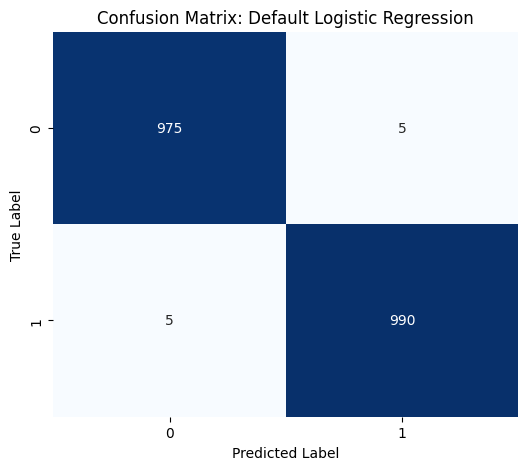

Model saved successfully.


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
import pandas as pd


# load features and labeled data
x = load_npz(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/tfidf_features.npz')
y = pd.read_csv(r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/features/labeled_data.csv')

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)



print("\n--- Training Logistic Regression Model ---")

# 1. Instantiating the LogisticRegression model
# class_weight='balanced': Addresses slight class imbalance
# max_iter=10000: Ensure convergence for large datasets/features
# random_state=42: For reproducibility
# solver='liblinear': A good default solver for smaller datasets with L1/L2 regularization.
#                     'saga' or 'lbfgs' are also common for larger data.
lr_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42, solver='liblinear')

# 2. Training the model using the training data
print("Starting Logistic Regression training...")
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

# 3. Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# 4. Evaluating the model's performance
print("\n--- Logistic Regression Model Evaluation on Test Set  ---")

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Classification Report
print("\nClassification Report (Default Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix (Default Logistic Regression):")
print(cm_lr)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Default Logistic Regression')
plt.show()


# saving the model
joblib.dump(lr_model, r'D:/JantaKoAwaj-FYP/jka-ml-model/dataset/models/lr_model.pkl')
print("Model saved successfully.")


# combine predictions from multiple models to evaluate the performance

In [42]:
import numpy as np
from scipy.stats import mode

# Stack predictions (shape will be: [3, n_samples])
predictions = np.vstack([y_pred_tuned_mnb, y_pred_linSVC, y_pred_lr])

# Apply majority vote across the models for each test sample
y_pred_ensemble, _ = mode(predictions, axis=0)  # returns (mode, count)

# Flatten the result
y_pred_ensemble = y_pred_ensemble.flatten()


In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))


Accuracy: 0.9974683544303797
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       995

    accuracy                           1.00      1975
   macro avg       1.00      1.00      1.00      1975
weighted avg       1.00      1.00      1.00      1975

Confusion Matrix:
 [[975   5]
 [  0 995]]
